## Modèle de Prédiction du Risque de Décrochage - EPITECH Bordeaux

Ce notebook entraîne un modèle de machine learning pour prédire le risque de décrochage des étudiants.

## 1. Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, accuracy_score,
    mean_squared_error, r2_score
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("✓ Bibliothèques importées")

✓ Bibliothèques importées


## 2. Chargement et exploration des données

In [2]:
# Chargement du dataset
df = pd.read_csv('dataset_epitech_bordeaux_decrochage.csv', encoding='utf-8-sig')

print(f"✓ Dataset chargé : {len(df)} étudiants")
print(f"✓ Nombre de variables : {len(df.columns)}")
print(f"\nAperçu des données :")
df.head()

✓ Dataset chargé : 300 étudiants
✓ Nombre de variables : 28

Aperçu des données :


,id_etudiant,etablissement,programme,classe,annee_etude,tranche_age,note_moyenne,note_programmation,note_projet,note_innovation,...,nb_activites_participees,boursier,temps_etude_semaine,nb_heures_cours_semaine,taille_classe,nb_rdv_pedagogique,nb_demandes_aide,nb_rappel_discipline,nb_echec_evaluation,satisfaction_formation
0,EPI-BDX-00001,EPITECH Bordeaux,Programme Grande École,PGE-4A-G5,4,18-20,13.9,16.0,12.1,13.7,...,1,0,37,30,Grande (>35),1,0,0,1,0.74
1,EPI-BDX-00002,EPITECH Bordeaux,Programme Grande École,PGE-5A-G4,5,21-23,11.4,9.9,8.3,12.6,...,2,1,21,30,Moyenne (25-35),3,0,0,0,0.22
2,EPI-BDX-00003,EPITECH Bordeaux,Bachelor,BACH-1A-G4,1,24-26,16.9,18.1,17.5,18.2,...,0,0,23,25,Petite (<25),2,3,0,0,0.39
3,EPI-BDX-00004,EPITECH Bordeaux,Bachelor,BACH-2A-G2,2,21-23,7.7,6.6,9.3,6.5,...,2,0,35,20,Grande (>35),3,5,0,1,0.78
4,EPI-BDX-00005,EPITECH Bordeaux,Programme Grande École,PGE-5A-G1,5,18-20,8.5,8.5,11.2,7.4,...,1,0,25,25,Grande (>35),1,0,0,1,0.22


In [3]:
# Informations sur le dataset
print("Informations générales :")
df.info()
print("\n" + "="*70)
print("Statistiques descriptives :")
df.describe()

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_etudiant               300 non-null    object 
 1   etablissement             300 non-null    object 
 2   programme                 300 non-null    object 
 3   classe                    300 non-null    object 
 4   annee_etude               300 non-null    int64  
 5   tranche_age               300 non-null    object 
 6   note_moyenne              300 non-null    float64
 7   note_programmation        300 non-null    float64
 8   note_projet               300 non-null    float64
 9   note_innovation           300 non-null    float64
 10  taux_absences             300 non-null    float64
 11  nb_absences               300 non-null    int64  
 12  nb_retards                300 non-null    int64  
 13  participation_projets     300 non-null  

,annee_etude,note_moyenne,note_programmation,note_projet,note_innovation,taux_absences,nb_absences,nb_retards,participation_projets,participation_cours,...,nb_projets_en_retard,nb_activites_participees,boursier,temps_etude_semaine,nb_heures_cours_semaine,nb_rdv_pedagogique,nb_demandes_aide,nb_rappel_discipline,nb_echec_evaluation,satisfaction_formation
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.463333,12.600000,12.544000,12.788000,12.602000,7.134333,0.886667,0.553333,0.590433,0.624133,...,0.760000,1.316667,0.366667,29.660000,26.116667,2.073333,1.530000,0.270000,0.536667,0.585500
std,1.342135,2.962305,3.372632,3.422587,3.088721,4.195529,1.001916,0.826296,0.198208,0.202909,...,0.908378,1.302065,0.482700,10.055917,4.662853,1.547883,1.200237,0.533588,0.789980,0.198941
min,1.000000,5.600000,5.000000,5.000000,5.000000,0.200000,0.000000,0.000000,0.050000,0.020000,...,0.000000,0.000000,0.000000,10.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.090000
25%,1.000000,10.400000,9.975000,10.275000,10.375000,3.600000,0.000000,0.000000,0.437500,0.487500,...,0.000000,0.000000,0.000000,22.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.457500
50%,2.000000,12.900000,12.750000,12.600000,12.650000,6.700000,1.000000,0.000000,0.590000,0.640000,...,1.000000,1.000000,0.000000,29.000000,25.000000,2.000000,1.000000,0.000000,0.000000,0.600000
75%,3.000000,14.800000,15.100000,15.400000,14.800000,10.100000,2.000000,1.000000,0.750000,0.780000,...,1.000000,2.000000,1.000000,37.000000,30.000000,3.000000,2.000000,0.000000,1.000000,0.740000
max,5.000000,20.000000,20.000000,20.000000,19.400000,21.600000,4.000000,5.000000,0.970000,0.970000,...,6.000000,7.000000,1.000000,58.000000,35.000000,7.000000,5.000000,2.000000,4.000000,0.970000


In [4]:
# Vérification des valeurs manquantes
missing = df.isnull().sum()
if missing.sum() > 0:
    print("Valeurs manquantes :")
    print(missing[missing > 0])
else:
    print("✓ Aucune valeur manquante")

✓ Aucune valeur manquante


## 3. Création de la variable cible (décrochage)

Puisque nous n'avons pas la variable cible dans le dataset, nous allons la créer en fonction des caractéristiques observables.

In [5]:
# Calcul du score de risque et création de la variable cible
def calculate_risk_score(row):
    """Calcule un score de risque basé sur les caractéristiques observables"""
    score = 0
    
    # Facteurs académiques (poids important)
    if row['note_moyenne'] < 10:
        score += 0.25
    elif row['note_moyenne'] < 12:
        score += 0.15
    
    if row['note_projet'] < 10:
        score += 0.15  # Projets très importants à EPITECH
    
    if row['taux_absences'] > 15:
        score += 0.20
    elif row['taux_absences'] > 8:
        score += 0.10
    
    if row['nb_retards'] > 5:
        score += 0.05
    
    if row['participation_projets'] < 0.3:
        score += 0.15  # Participation aux projets cruciale
    
    if row['nb_projets_en_retard'] > 2:
        score += 0.10
    
    if row['participation_cours'] < 0.3:
        score += 0.10
    
    # Facteurs comportementaux observables
    if row['temps_etude_semaine'] < 20:
        score += 0.10  # EPITECH demande beaucoup de travail
    
    if row['nb_rdv_pedagogique'] == 0 and row['annee_etude'] == 1:
        score += 0.05  # Pas de contact en première année
    
    if row['nb_demandes_aide'] == 0 and row['note_moyenne'] < 12:
        score += 0.05  # Pas de demande d'aide malgré difficultés
    
    if row['nb_rappel_discipline'] > 2:
        score += 0.10
    
    if row['nb_echec_evaluation'] > 3:
        score += 0.15
    
    if row['satisfaction_formation'] < 0.4:
        score += 0.10
    
    if row['participation_activites'] < 0.2:
        score += 0.05  # Faible intégration
    
    # Année d'étude (première année plus à risque)
    if row['annee_etude'] == 1:
        score += 0.08
    
    # Programme (Bachelor peut avoir plus de décrochage)
    if row['programme'] == 'Bachelor' and row['annee_etude'] == 1:
        score += 0.05
    
    return min(1.0, max(0.0, score))

# Application de la fonction
df['risque_score'] = df.apply(calculate_risk_score, axis=1)

# Création de la variable cible binaire (décrochage)
# Utilisation d'un seuil sur le score de risque
seuil_risque = 0.4  # Seuil ajustable
df['decrochage'] = (df['risque_score'] >= seuil_risque).astype(int)

# Ajout d'un peu de bruit pour rendre le problème plus réaliste
noise = np.random.binomial(1, 0.05, size=len(df))  # 5% de bruit
df['decrochage'] = (df['decrochage'] | noise).astype(int)

print(f"✓ Score de risque calculé (moyenne: {df['risque_score'].mean():.3f})")
print(f"✓ Variable cible créée (taux de décrochage: {df['decrochage'].mean()*100:.2f}%)")
print(f"\nRépartition :")
print(df['decrochage'].value_counts())

✓ Score de risque calculé (moyenne: 0.267)
✓ Variable cible créée (taux de décrochage: 33.33%)

Répartition :
decrochage
0    200
1    100
Name: count, dtype: int64


## 4. Visualisation des données

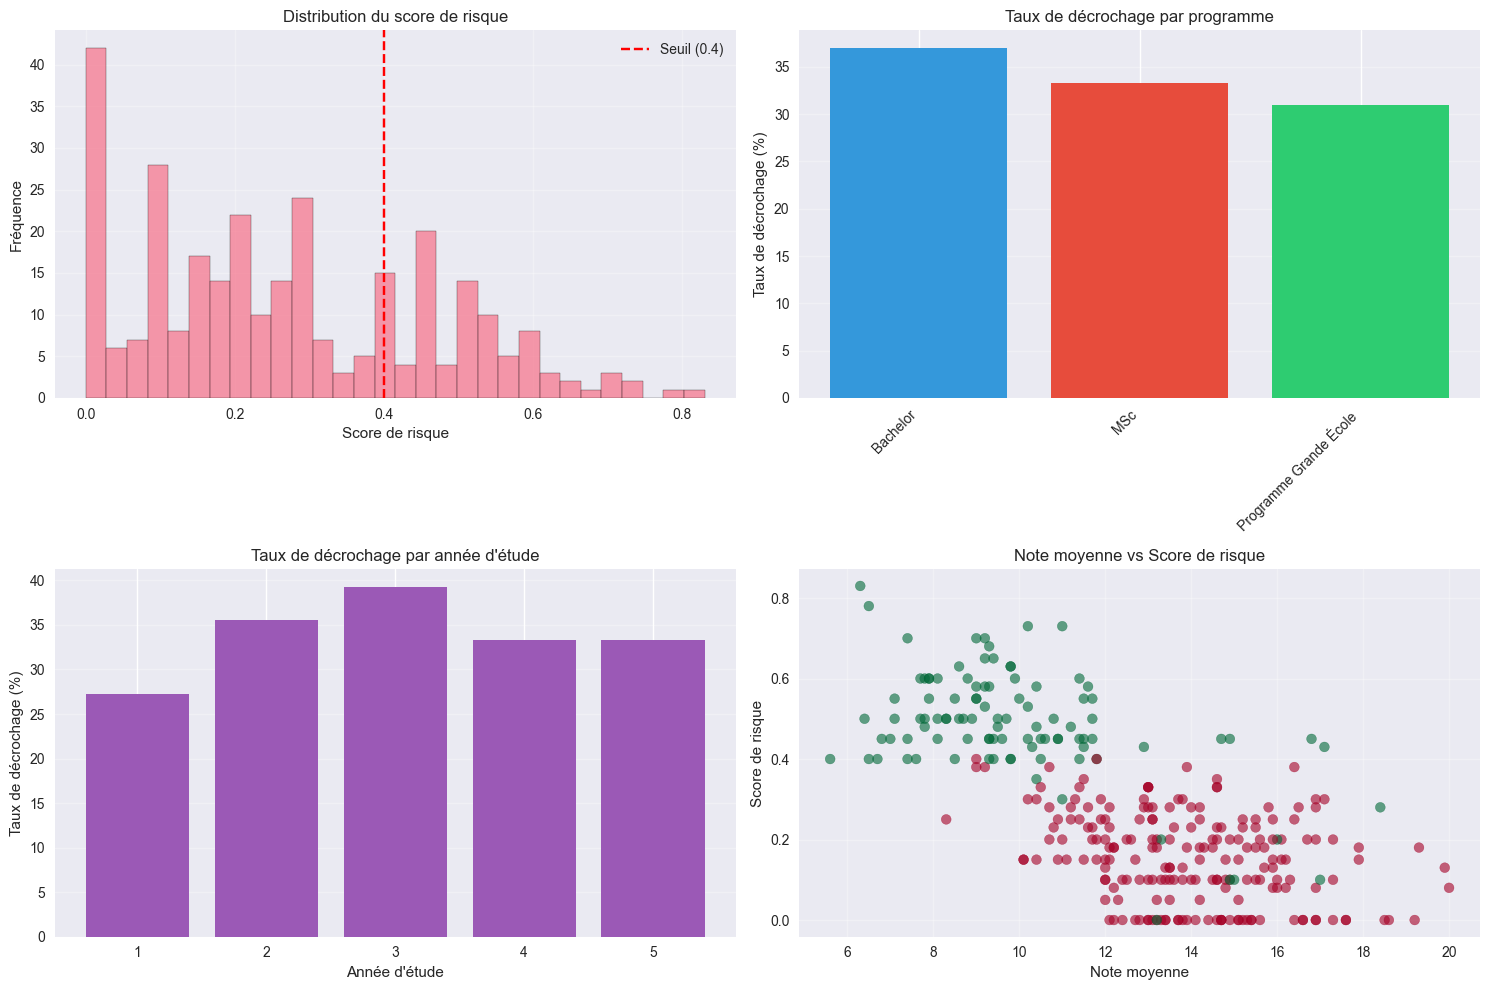

In [21]:
# Distribution du score de risque
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution du risque
axes[0, 0].hist(df['risque_score'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(seuil_risque, color='red', linestyle='--', label=f'Seuil ({seuil_risque})')
axes[0, 0].set_xlabel('Score de risque')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Distribution du score de risque')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Décrochage par programme
decrochage_prog = df.groupby('programme')['decrochage'].agg(['mean', 'count'])
axes[0, 1].bar(decrochage_prog.index, decrochage_prog['mean']*100, color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 1].set_ylabel('Taux de décrochage (%)')
axes[0, 1].set_title('Taux de décrochage par programme')
axes[0, 1].grid(True, alpha=0.3, axis='y')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Décrochage par année
decrochage_annee = df.groupby('annee_etude')['decrochage'].mean()
axes[1, 0].bar(decrochage_annee.index, decrochage_annee*100, color='#9b59b6')
axes[1, 0].set_xlabel('Année d\'étude')
axes[1, 0].set_ylabel('Taux de décrochage (%)')
axes[1, 0].set_title('Taux de décrochage par année d\'étude')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Corrélation entre note moyenne et décrochage
axes[1, 1].scatter(df['note_moyenne'], df['risque_score'], 
                  c=df['decrochage'], cmap='RdYlGn', alpha=0.6, s=50)
axes[1, 1].set_xlabel('Note moyenne')
axes[1, 1].set_ylabel('Score de risque')
axes[1, 1].set_title('Note moyenne vs Score de risque')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Préparation des données pour le ML

In [7]:
# Sélection des features
# On exclut les colonnes non pertinentes pour la prédiction
features_to_drop = ['id_etudiant', 'etablissement', 'classe', 'risque_score', 'decrochage']
X = df.drop(columns=features_to_drop)
y = df['decrochage']

print(f"✓ Features sélectionnées : {len(X.columns)}")
print(f"✓ Variable cible : décrochage ({y.sum()} cas positifs, {len(y)-y.sum()} cas négatifs)")
print(f"\nFeatures : {list(X.columns)}")

✓ Features sélectionnées : 25
✓ Variable cible : décrochage (100 cas positifs, 200 cas négatifs)

Features : ['programme', 'annee_etude', 'tranche_age', 'note_moyenne', 'note_programmation', 'note_projet', 'note_innovation', 'taux_absences', 'nb_absences', 'nb_retards', 'participation_projets', 'participation_cours', 'participation_activites', 'nb_projets_termines', 'nb_projets_en_retard', 'nb_activites_participees', 'boursier', 'temps_etude_semaine', 'nb_heures_cours_semaine', 'taille_classe', 'nb_rdv_pedagogique', 'nb_demandes_aide', 'nb_rappel_discipline', 'nb_echec_evaluation', 'satisfaction_formation']


In [8]:
# Encodage des variables catégorielles
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Variables catégorielles à encoder : {categorical_cols}")

label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"  - {col}: {len(le.classes_)} catégories")

print("\n✓ Encodage terminé")

Variables catégorielles à encoder : ['programme', 'tranche_age', 'taille_classe']
  - programme: 3 catégories
  - tranche_age: 4 catégories
  - taille_classe: 3 catégories

✓ Encodage terminé


In [9]:
# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Données d'entraînement : {len(X_train)} échantillons")
print(f"✓ Données de test : {len(X_test)} échantillons")
print(f"\nRépartition train : {y_train.value_counts().to_dict()}")
print(f"Répartition test : {y_test.value_counts().to_dict()}")

✓ Données d'entraînement : 240 échantillons
✓ Données de test : 60 échantillons

Répartition train : {0: 160, 1: 80}
Répartition test : {0: 40, 1: 20}


In [10]:
# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Normalisation terminée")

✓ Normalisation terminée


## 6. Entraînement des modèles

In [11]:
# Test de plusieurs modèles
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Entraînement : {name}")
    print(f"{'='*70}")
    
    # Entraînement
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy : {accuracy:.4f}")
    print(f"ROC-AUC : {roc_auc:.4f}")
    print(f"\nRapport de classification :")
    print(classification_report(y_test, y_pred))


Entraînement : Random Forest
Accuracy : 0.9167
ROC-AUC : 0.9494

Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.92      0.91        60


Entraînement : Gradient Boosting
Accuracy : 0.9167
ROC-AUC : 0.9175

Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.92      0.91        60


Entraînement : Logistic Regression
Accuracy : 0.8333
ROC-AUC : 0.8888

Rapport de classification :
              precision    recall  f1-score   support


## 7. Sélection du meilleur modèle


In [12]:
# Comparaison des modèles
comparison = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

comparison = comparison.sort_values('ROC-AUC', ascending=False)
print("Comparaison des modèles :")
print(comparison.to_string(index=False))

# Sélection du meilleur modèle
best_model_name = comparison.iloc[0]['Modèle']
best_model = results[best_model_name]['model']

print(f"\n✓ Meilleur modèle : {best_model_name}")
print(f"  - Accuracy : {results[best_model_name]['accuracy']:.4f}")
print(f"  - ROC-AUC : {results[best_model_name]['roc_auc']:.4f}")

Comparaison des modèles :
             Modèle  Accuracy  ROC-AUC
      Random Forest  0.916667 0.949375
  Gradient Boosting  0.916667 0.917500
Logistic Regression  0.833333 0.888750

✓ Meilleur modèle : Random Forest
  - Accuracy : 0.9167
  - ROC-AUC : 0.9494


## 8. Visualisation des résultats du meilleur modèle

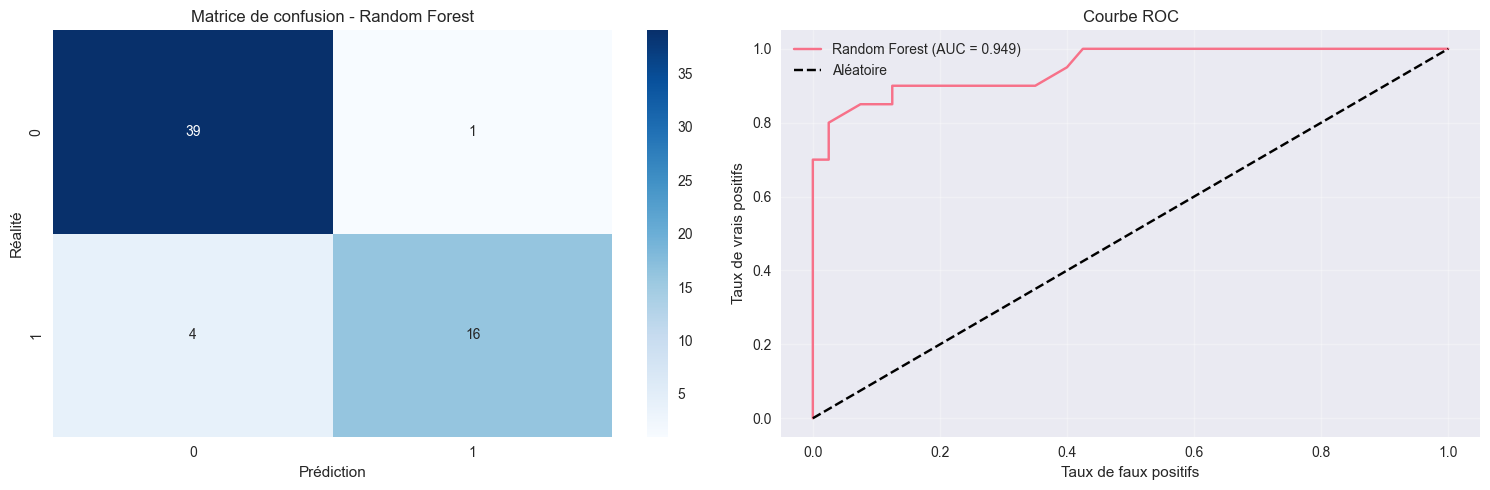

In [13]:
# Matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

y_pred_best = results[best_model_name]['y_pred']
y_pred_proba_best = results[best_model_name]['y_pred_proba']

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réalité')
axes[0].set_title(f'Matrice de confusion - {best_model_name}')

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
axes[1].plot(fpr, tpr, label=f'{best_model_name} (AUC = {results[best_model_name]["roc_auc"]:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Aléatoire')
axes[1].set_xlabel('Taux de faux positifs')
axes[1].set_ylabel('Taux de vrais positifs')
axes[1].set_title('Courbe ROC')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Importance des features

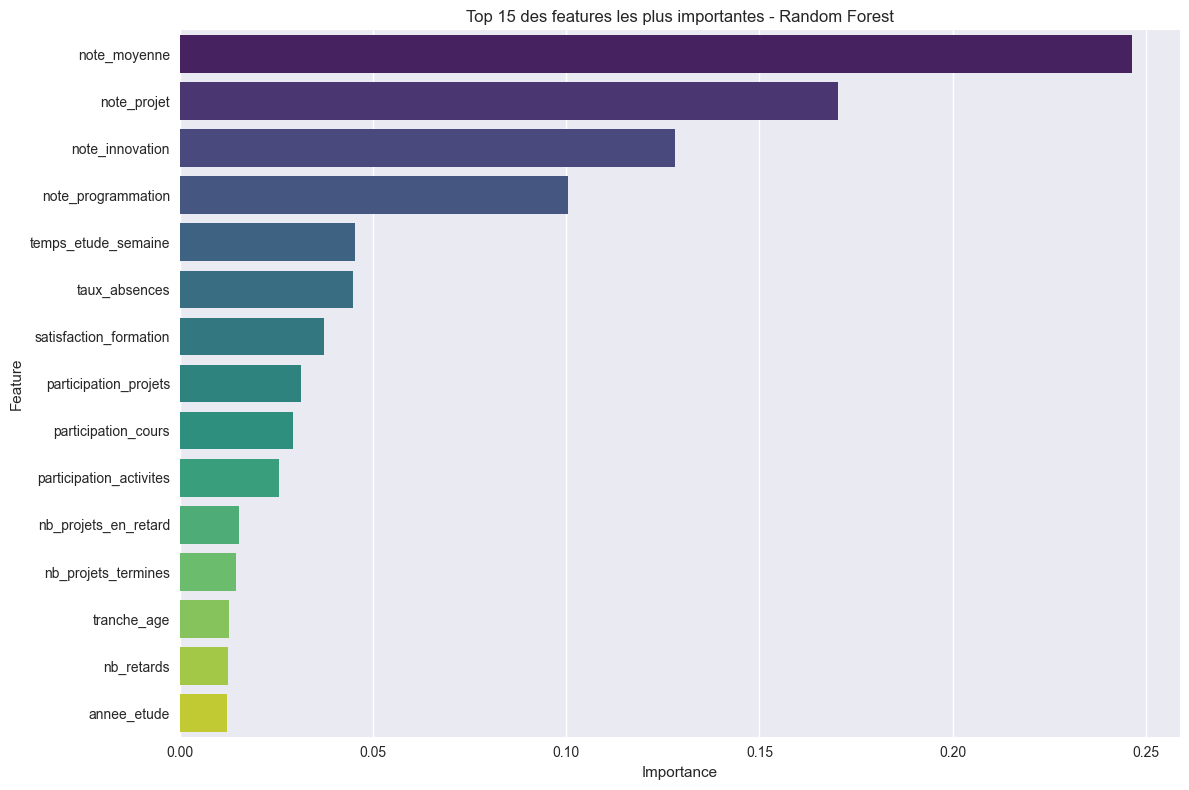

Top 10 des features les plus importantes :
                feature  importance
           note_moyenne    0.246513
            note_projet    0.170458
        note_innovation    0.128150
     note_programmation    0.100424
    temps_etude_semaine    0.045363
          taux_absences    0.044948
 satisfaction_formation    0.037392
  participation_projets    0.031357
    participation_cours    0.029400
participation_activites    0.025736


In [14]:
# Importance des features (pour Random Forest et Gradient Boosting)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top 15 des features les plus importantes - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 des features les plus importantes :")
    print(feature_importance.head(10).to_string(index=False))
else:
    print("Le modèle sélectionné n'a pas de feature_importances_")

## 10. Prédiction du score de risque

Modèle de prédiction du score de risque :
  - MSE : 0.0052
  - R² : 0.8815


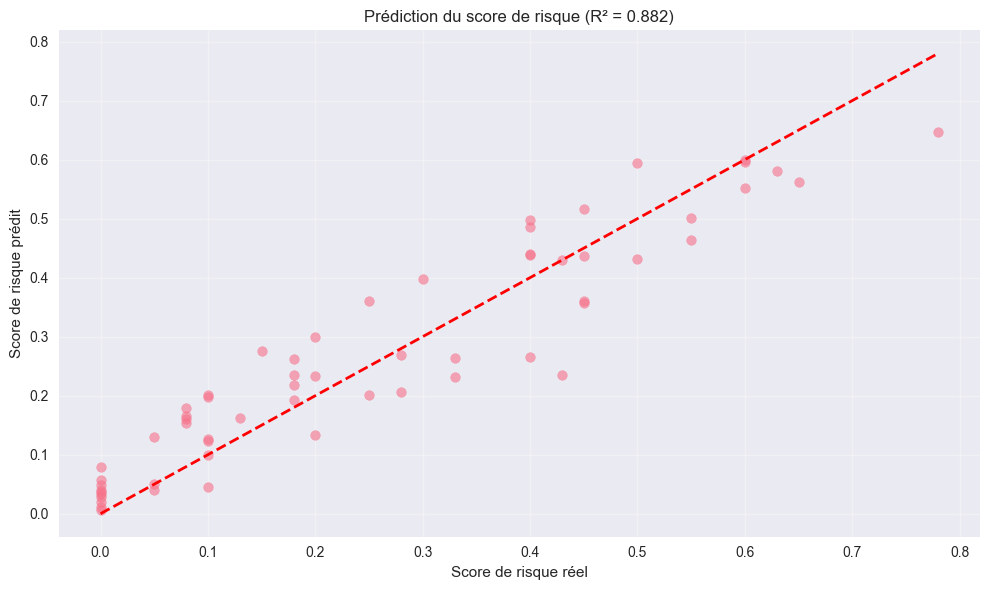

In [ ]:
# Pour prédire le score de risque, on utilise les probabilités du modèle
# On peut aussi entraîner un modèle de régression séparé

# Entraînement d'un modèle de régression pour prédire le score de risque
y_risque = df['risque_score']
X_train_risque, X_test_risque, y_train_risque, y_test_risque = train_test_split(
    X_encoded, y_risque, test_size=0.2, random_state=42
)

model_risque = RandomForestRegressor(n_estimators=100, random_state=42)
model_risque.fit(X_train_risque, y_train_risque)
y_pred_risque = model_risque.predict(X_test_risque)

mse = mean_squared_error(y_test_risque, y_pred_risque)
r2 = r2_score(y_test_risque, y_pred_risque)

print(f"Modèle de prédiction du score de risque :")
print(f"  - MSE : {mse:.4f}")
print(f"  - R² : {r2:.4f}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(y_test_risque, y_pred_risque, alpha=0.6)
plt.plot([y_test_risque.min(), y_test_risque.max()], 
         [y_test_risque.min(), y_test_risque.max()], 'r--', lw=2)
plt.xlabel('Score de risque réel')
plt.ylabel('Score de risque prédit')
plt.title(f'Prédiction du score de risque (R² = {r2:.3f})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Sauvegarde des modèles

In [17]:
# Sauvegarde du modèle de classification
joblib.dump(best_model, 'modele_decrochage.pkl')
print("✓ Modèle de classification sauvegardé : modele_decrochage.pkl")

# Sauvegarde du modèle de régression (score de risque)
joblib.dump(model_risque, 'modele_risque_score.pkl')
print("✓ Modèle de score de risque sauvegardé : modele_risque_score.pkl")

# Sauvegarde du scaler
if best_model_name == 'Logistic Regression':
    joblib.dump(scaler, 'scaler.pkl')
    print("✓ Scaler sauvegardé : scaler.pkl")

# Sauvegarde des encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
print("✓ Label encoders sauvegardés : label_encoders.pkl")

# Sauvegarde des noms de features
joblib.dump(list(X.columns), 'feature_names.pkl')
print("✓ Noms des features sauvegardés : feature_names.pkl")

✓ Modèle de classification sauvegardé : modele_decrochage.pkl
✓ Modèle de score de risque sauvegardé : modele_risque_score.pkl
✓ Label encoders sauvegardés : label_encoders.pkl
✓ Noms des features sauvegardés : feature_names.pkl


## 12. Résumé et conclusions

In [18]:
print("="*70)
print("RÉSUMÉ DU MODÈLE")
print("="*70)
print(f"\nMeilleur modèle : {best_model_name}")
print(f"Accuracy : {results[best_model_name]['accuracy']:.4f}")
print(f"ROC-AUC : {results[best_model_name]['roc_auc']:.4f}")
print(f"\nNombre de features : {len(X.columns)}")
print(f"Taille du dataset d'entraînement : {len(X_train)}")
print(f"Taille du dataset de test : {len(X_test)}")
print(f"\nModèles sauvegardés :")
print("  - modele_decrochage.pkl (classification binaire)")
print("  - modele_risque_score.pkl (régression pour score de risque)")
print("\n✓ Modèles prêts pour le déploiement dans le tableau de bord")

RÉSUMÉ DU MODÈLE

Meilleur modèle : Random Forest
Accuracy : 0.9167
ROC-AUC : 0.9494

Nombre de features : 25
Taille du dataset d'entraînement : 240
Taille du dataset de test : 60

Modèles sauvegardés :
  - modele_decrochage.pkl (classification binaire)
  - modele_risque_score.pkl (régression pour score de risque)

✓ Modèles prêts pour le déploiement dans le tableau de bord
